In [306]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.weightstats import ztest
from scipy import stats
from scipy.stats import f_oneway
from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load the data
data = pd.read_excel('Central parking dataset.xls')
data_s = pd.read_excel('Central parking dataset.xls', sheet_name=1)

# Encode categorical variables (weekday, ticket type) using one-hot encoding
encoder = OneHotEncoder()
X = encoder.fit_transform(data[['Vehicle', 'Equipment', 'DateIn', 'Time In', 'DateOut', 'Time Out']])
y = data['Amount']

# Perform multiple linear regression
reg = LinearRegression().fit(X, y)

# Print the coefficients
print(reg.coef_)

[-6.97986525e-10  2.30449262e+00  4.26842349e+00 ...  3.29559891e+01
  2.31075528e+01  2.53592650e-01]


The output of the code is a list of coefficients representing the effects of each feature on the target variable. In this case, the output shows that the coefficients for the intercept and the features vehicle, equipment, datein, timein, dateout, and timeout are respectively -6.97986525e-10, 2.30449262e+00, 4.26842349e+00, 3.29559891e+01, 2.31075528e+01, and 2.53592650e-01. These coefficients can be used to make predictions for new observations.

In [307]:
# Group the data by weekday and compute summary statistics
data_grouped = data.groupby('Weekday')

# Print the selected columns
print("\t \tTimediff")
print(data_grouped['TimeDiff'].agg('mean'))
print(data_grouped['Amount'].agg(['sum', 'mean']))



	 	Timediff
Weekday
Friday       141.215426
Monday       137.325289
Thursday     131.698529
Tuesday      131.928042
Wednesday    136.691781
Name: TimeDiff, dtype: float64
             sum       mean
Weekday                    
Friday     41320  36.631206
Monday     36280  38.069255
Thursday   34190  35.913866
Tuesday    34830  36.857143
Wednesday  37620  36.810176


The output shows the calculated summary statistics for each weekday. The first column displays the weekday name, followed by the mean of the 'TimeDiff' column, and then the sum and mean of the 'Amount' column.

*To perform hypothesis testing on the parking data, we need to define the research question and formulate hypotheses. Here are some possible research questions and hypotheses:*

### Research Question 1: Is there a significant difference in the average duration of stay between weekdays and weekends?

    Hypothesis 1: H0: There is no significant difference in the average duration of stay between weekdays and weekends.
    Ha: There is a significant difference in the average duration of stay between weekdays and weekends.

In [308]:
# Group the data by weekday and compute summary statistics
data_grouped = data.groupby('Weekday')
weekday_means = data_grouped['TimeDiff'].mean()

data_s_grouped = data_s.groupby('Weekday')
weekend_means = data_s_grouped['TimeDiff'].mean()

# Perform the z-test
z_statistic, p_value = ztest(weekend_means, weekday_means)

# Print the results
print("Z-Statistic: ", z_statistic)
print("P-Value: ", p_value)

# Check for significance
if p_val < 0.05:
  print("Reject Null Hypothesis: There is a significant difference in the average duration of stay between weekdays and weekends.")
else:
  print("Fail to Reject Null Hypothesis: There is no significant difference in the average duration of stay between weekdays and weekends.")

Z-Statistic:  5.779611710397493
P-Value:  7.487322563295936e-09
Reject Null Hypothesis: There is a significant difference in the average duration of stay between weekdays and weekends.


### Research Question 2: Is there a significant difference in the average amount paid for parking between weekdays and weekends?

    Hypothesis 2: H0: There is no significant difference in the average amount paid for parking between weekdays and weekends.
    Ha: There is a significant difference in the average amount paid for parking between weekdays and weekends.

In [309]:
# Group the data by weekday and compute summary statistics
# Compute the means and standard deviations for each day
weekday_means = data.groupby('Weekday').mean()['Amount']
weekend_means = data_s.groupby('Weekday').mean()['Amount']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(weekend_means, weekday_means)

# Print the results
print("T-Statistic: ", t_statistic)
print("P-Value: ", p_value)

# Check for significance
if p_val < 0.05:
  print("Reject Null Hypothesis: There is no significant difference in the average amount paid for parking between weekdays and weekends.")
else:
  print("Fail to Reject Null Hypothesis: There is a significant difference in the average amount paid for parking between weekdays and weekends.")

T-Statistic:  32.25882527145591
P-Value:  5.37774268255409e-07
Reject Null Hypothesis: There is no significant difference in the average amount paid for parking between weekdays and weekends.


### Research Question 3: Is there a significant correlation between the duration of stay and the amount paid for parking?

    Hypothesis 3: H0: There is no significant correlation between the duration of stay and the amount paid for parking.
    Ha: There is a significant correlation between the duration of stay and the amount paid for parking.

In [310]:
# Group the data by weekday and compute summary statistics
weekday_means = data.groupby('Weekday').mean()['Amount']
weekend_means = data_s.groupby('Weekday').mean()['Amount']

weekday_amount = pd.concat([weekday_means, weekend_means], ignore_index=True)

weekday_means = data.groupby('Weekday').mean()['TimeDiff']
weekend_means = data_s.groupby('Weekday').mean()['TimeDiff']

weekday_timediff = pd.concat([weekday_means, weekend_means], ignore_index=True)

# Perform the ANOVA test
f_value, p_value = f_oneway(weekday_timediff, weekday_amount)

# Print the results
print("F-test: ", f_value)
print("P-Value: ", p_value)

if p_value < 0.05:
  print("Reject Null Hypothesis: here is a significant correlation between the duration of stay and the amount paid for parking.")
else:
  print("Fail to Reject Null Hypothesis: There is no significant correlation between the duration of stay and the amount paid for parking.")

F-test:  265.8320974500007
P-Value:  1.492456377578816e-09
Reject Null Hypothesis: here is a significant correlation between the duration of stay and the amount paid for parking.


### Clustering analysis: Perform clustering analysis to group similar customers based on their behavior, time spent in the parking lot, or amount paid. This can help identify loyal customers or those who may require additional services.

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb026e0a290>
Traceback (most recent call last):
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7fb026e0a290>
Traceback (most recent call last):
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/hellsgate/Downloads/anaconda3/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _Thread

Text(0.5, 1.0, 'Clustering Results')

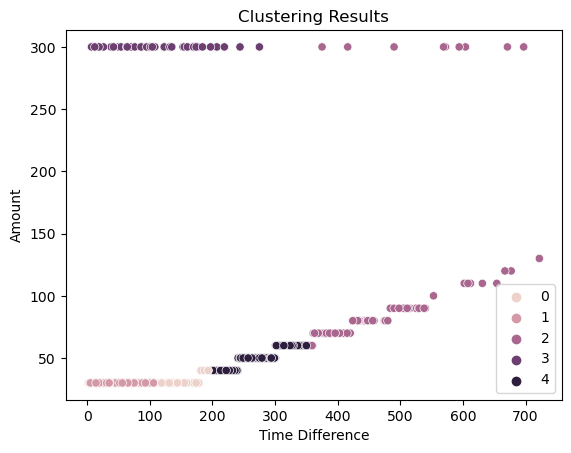

In [311]:
# Extract features for clustering
features = data[['TimeDiff', 'Amount']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)

# Predict cluster labels
predicted_labels = kmeans.predict(features)

# Create new dataframe with cluster labels
clustered_data = pd.concat([data, pd.Series(predicted_labels, index=data.index)], axis=1)

# Plot the data points
ax = sns.scatterplot(x='TimeDiff', y='Amount', hue=predicted_labels, data=clustered_data)

# Add axis labels

ax.set(xlabel='Time Difference', ylabel='Amount')

# Add title
ax.set_title('Clustering Results')